In [7]:
import pandas as pd
import json

import matplotlib.pyplot as plt
# import seaborn as sns

In [8]:
# sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11

In [9]:
country_mapping = "data/2022/country.json"
with open(country_mapping, 'r') as f:
    country_data = json.load(f)

In [13]:
# read .dta file
df_2022 = pd.read_stata('ZA10000_v2-0-0/ZA10000_v2-0-0.dta')
print(f"Total records in the survey data: {len(df_2022)}")
print(f"Total columns in the survey data: {len(df_2022.columns)}")
df_2022.head()

Total records in the survey data: 45762
Total columns in the survey data: 417


,studyno,version,doi,country,c_sample,c_alphan,v1,v2,v3,v4,...,DATEMO,DATEDY,INTLANG,DWEIGHT_HH,DWEIGHT_TS,DWEIGHT_COM,PSWEIGHT,WEIGHT_COM,MODE,PARTIALS
0,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,40. AT-Austria,40. AT-Austria,AT,1. Strongly agree,5. Strongly disagree,5. Strongly disagree,5. Strongly disagree,...,1. January,28,11. German (deu),1.210093,1. No weighting,1.210093,0.627508,0.170447,"50. CAWI, self-completion, web questionnaire",1. Complete case
1,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,40. AT-Austria,40. AT-Austria,AT,4. Disagree,1. Strongly agree,2. Agree,2. Agree,...,1. January,5,11. German (deu),1.210093,1. No weighting,1.210093,1.529463,0.85329,"50. CAWI, self-completion, web questionnaire",1. Complete case
2,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,40. AT-Austria,40. AT-Austria,AT,4. Disagree,1. Strongly agree,1. Strongly agree,2. Agree,...,1. January,30,11. German (deu),1.649203,1. No weighting,1.649203,2.394,3.139915,"50. CAWI, self-completion, web questionnaire",1. Complete case
3,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,40. AT-Austria,40. AT-Austria,AT,5. Strongly disagree,2. Agree,2. Agree,1. Strongly agree,...,1. January,5,11. German (deu),1.649203,1. No weighting,1.649203,1.057297,2.905909,"50. CAWI, self-completion, web questionnaire",1. Complete case
4,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,40. AT-Austria,40. AT-Austria,AT,1. Strongly agree,5. Strongly disagree,4. Disagree,5. Strongly disagree,...,1. January,5,11. German (deu),0.675291,1. No weighting,0.675291,0.460084,0.530512,"50. CAWI, self-completion, web questionnaire",1. Complete case


In [ ]:
df_2022['c_alphan'] = df_2022['c_alphan'].map(country_data)

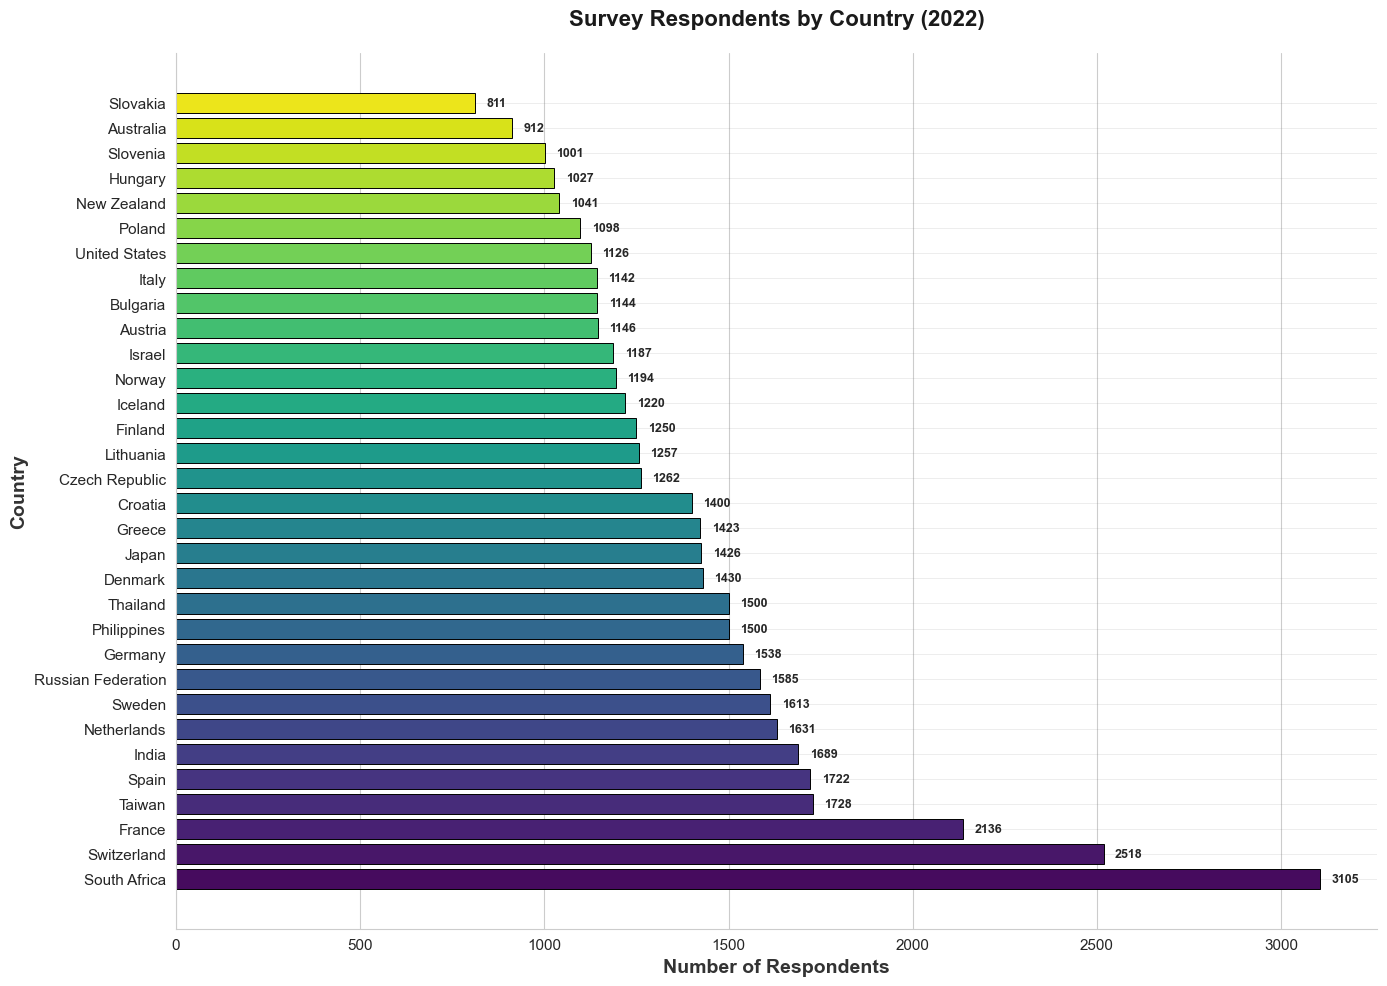

In [ ]:
country_counts = df_2022['c_alphan'].value_counts()

fig, ax = plt.subplots(figsize=(14, 10))

colors = sns.color_palette("viridis", n_colors=len(country_counts))

bars = ax.barh(country_counts.index, country_counts.values, color=colors, edgecolor='black', linewidth=0.7)

for bar in bars:
    width = bar.get_width()
    ax.text(width + max(country_counts.values)*0.01, bar.get_y() + bar.get_height()/2, 
            f'{int(width)}', ha='left', va='center', fontsize=9, fontweight='bold')

ax.set_xlabel('Number of Respondents', fontsize=14, fontweight='bold', color='#333333')
ax.set_ylabel('Country', fontsize=14, fontweight='bold', color='#333333')
ax.set_title('Survey Respondents by Country (2022)', fontsize=16, fontweight='bold', pad=20, color='#1a1a1a')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='x', alpha=0.4, linestyle='-', linewidth=0.8, color='gray')
ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.5, color='gray')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

## Sample EDA
Sample analysis on the data collected from surverys conducted in Germany in 2022.

In [ ]:
country = "Germany"
df_2022_germany = df_2022[df_2022['c_alphan'] == country]
print(f"Total records in the survey data for {country}: {len(df_2022_germany)}")

Total records in the survey data for Germany: 1538


In [ ]:
df_2022_germany.head()

,studyno,version,doi,country,c_sample,c_alphan,v1,v2,v3,v4,...,DATEMO,DATEDY,INTLANG,DWEIGHT_HH,DWEIGHT_TS,DWEIGHT_COM,PSWEIGHT,WEIGHT_COM,MODE,PARTIALS
6982,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,276. DE-Germany,27601. DE-W-Germany-West,Germany,1. Strongly agree,2. Agree,2. Agree,2. Agree,...,6. June,20,11. German (deu),1. No weighting,1.249453,1.249453,1. No weighting,1.249453,"34. SC, mailed to, mailed back by R",1. Complete case
6983,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,276. DE-Germany,27601. DE-W-Germany-West,Germany,3. Neither agree nor disagree,3. Neither agree nor disagree,1. Strongly agree,5. Strongly disagree,...,6. June,22,11. German (deu),1. No weighting,1.249453,1.249453,1. No weighting,1.249453,"34. SC, mailed to, mailed back by R",1. Complete case
6984,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,276. DE-Germany,27601. DE-W-Germany-West,Germany,1. Strongly agree,4. Disagree,1. Strongly agree,1. Strongly agree,...,-9. No answer; info missing,-9. No answer; info missing,11. German (deu),1. No weighting,1.249453,1.249453,1. No weighting,1.249453,"34. SC, mailed to, mailed back by R",1. Complete case
6985,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,276. DE-Germany,27601. DE-W-Germany-West,Germany,3. Neither agree nor disagree,3. Neither agree nor disagree,4. Disagree,5. Strongly disagree,...,6. June,7,11. German (deu),1. No weighting,1.249453,1.249453,1. No weighting,1.249453,"34. SC, mailed to, mailed back by R",1. Complete case
6986,10000. GESIS Study Number ZA10000,2.0.0 (2025-08-22),doi:10.4232/5.ZA10000.2.0.0,276. DE-Germany,27601. DE-W-Germany-West,Germany,1. Strongly agree,2. Agree,1. Strongly agree,5. Strongly disagree,...,6. June,17,11. German (deu),1. No weighting,1.249453,1.249453,1. No weighting,1.249453,"34. SC, mailed to, mailed back by R",1. Complete case


In [ ]:
# Visualise top-5 questions, that start with 'v'
top_questions = df_2022_germany[df_2022_germany.columns[df_2022_germany.columns.str.startswith('v')]]
# top_questions.plot(kind='barh', title=f'Top 5 questions in {country}

In [ ]:
top_questions.head()

,version,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72
6982,2.0.0 (2025-08-22),1. Strongly agree,2. Agree,2. Agree,2. Agree,2. Agree,2. Agree,3. Women and men should take equal responsibility,3. Mothers and fathers are equally suited,3. Stay at home,...,0. None; HU: Did not raise any children,2. No,2. No,2. No,2. No,2. No,"-1. Not available (AT, CZ, DE, DK, ES, FR, GR,...","-1. Not available (AT, CZ, DE, DK, ES, FI, FR,...","-1. Not available (AT, CZ, DE, DK, ES, FI, FR,...","-1. Not available (AT, CZ, DE, DK, ES, FR, GR,..."
6983,2.0.0 (2025-08-22),3. Neither agree nor disagree,3. Neither agree nor disagree,1. Strongly agree,5. Strongly disagree,5. Strongly disagree,5. Strongly disagree,4. Men should take somewhat more responsibility,2. Mothers are somewhat better suited,2. Work part-time,...,1. 1 child,2. No,2. No,2. No,2. No,1. Yes,"-1. Not available (AT, CZ, DE, DK, ES, FR, GR,...","-1. Not available (AT, CZ, DE, DK, ES, FI, FR,...","-1. Not available (AT, CZ, DE, DK, ES, FI, FR,...","-1. Not available (AT, CZ, DE, DK, ES, FR, GR,..."
6984,2.0.0 (2025-08-22),1. Strongly agree,4. Disagree,1. Strongly agree,1. Strongly agree,-8. Can't choose,2. Agree,4. Men should take somewhat more responsibility,3. Mothers and fathers are equally suited,3. Stay at home,...,1. 1 child,-9. No answer,1. Yes,-9. No answer,-9. No answer,-9. No answer,"-1. Not available (AT, CZ, DE, DK, ES, FR, GR,...","-1. Not available (AT, CZ, DE, DK, ES, FI, FR,...","-1. Not available (AT, CZ, DE, DK, ES, FI, FR,...","-1. Not available (AT, CZ, DE, DK, ES, FR, GR,..."
6985,2.0.0 (2025-08-22),3. Neither agree nor disagree,3. Neither agree nor disagree,4. Disagree,5. Strongly disagree,4. Disagree,5. Strongly disagree,3. Women and men should take equal responsibility,3. Mothers and fathers are equally suited,-8. Can't choose,...,0. None; HU: Did not raise any children,2. No,2. No,2. No,2. No,2. No,"-1. Not available (AT, CZ, DE, DK, ES, FR, GR,...","-1. Not available (AT, CZ, DE, DK, ES, FI, FR,...","-1. Not available (AT, CZ, DE, DK, ES, FI, FR,...","-1. Not available (AT, CZ, DE, DK, ES, FR, GR,..."
6986,2.0.0 (2025-08-22),1. Strongly agree,2. Agree,1. Strongly agree,5. Strongly disagree,5. Strongly disagree,5. Strongly disagree,3. Women and men should take equal responsibility,3. Mothers and fathers are equally suited,3. Stay at home,...,0. None; HU: Did not raise any children,2. No,2. No,2. No,2. No,2. No,"-1. Not available (AT, CZ, DE, DK, ES, FR, GR,...","-1. Not available (AT, CZ, DE, DK, ES, FI, FR,...","-1. Not available (AT, CZ, DE, DK, ES, FI, FR,...","-1. Not available (AT, CZ, DE, DK, ES, FR, GR,..."


In [ ]:
questions_mapping = json.load(open('data/2022/ZA10000_variables_short.json', 'r'))

In [ ]:
selected_questions = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6']
questions_descriptions = [questions_mapping[q] for q in selected_questions]
print(questions_descriptions)

['Q1a Working mom can establish as warm relationship as a not working mom', 'Q1b Pre-school child is likely to suffer if mother works', 'Q1c Family life suffers when woman has full-time job', 'Q1d What women really want is home and kids', 'Q1e Being housewife is as fulfilling as working for pay', "Q1f Men's job earn money, women's job look after home"]


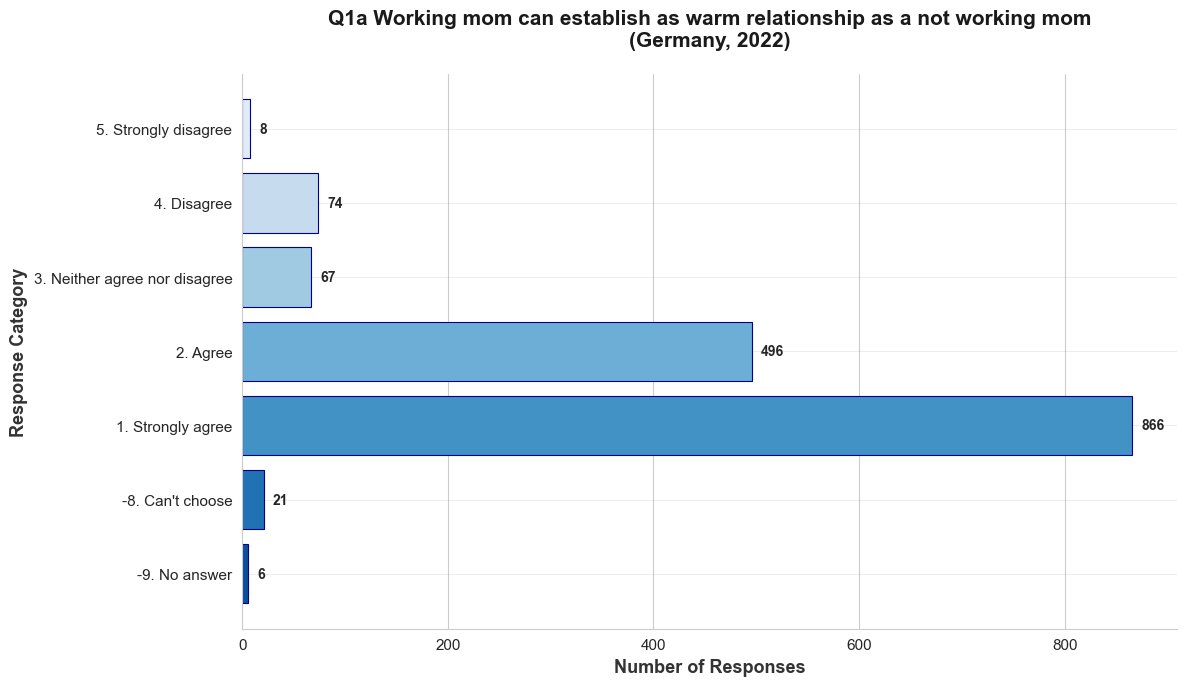

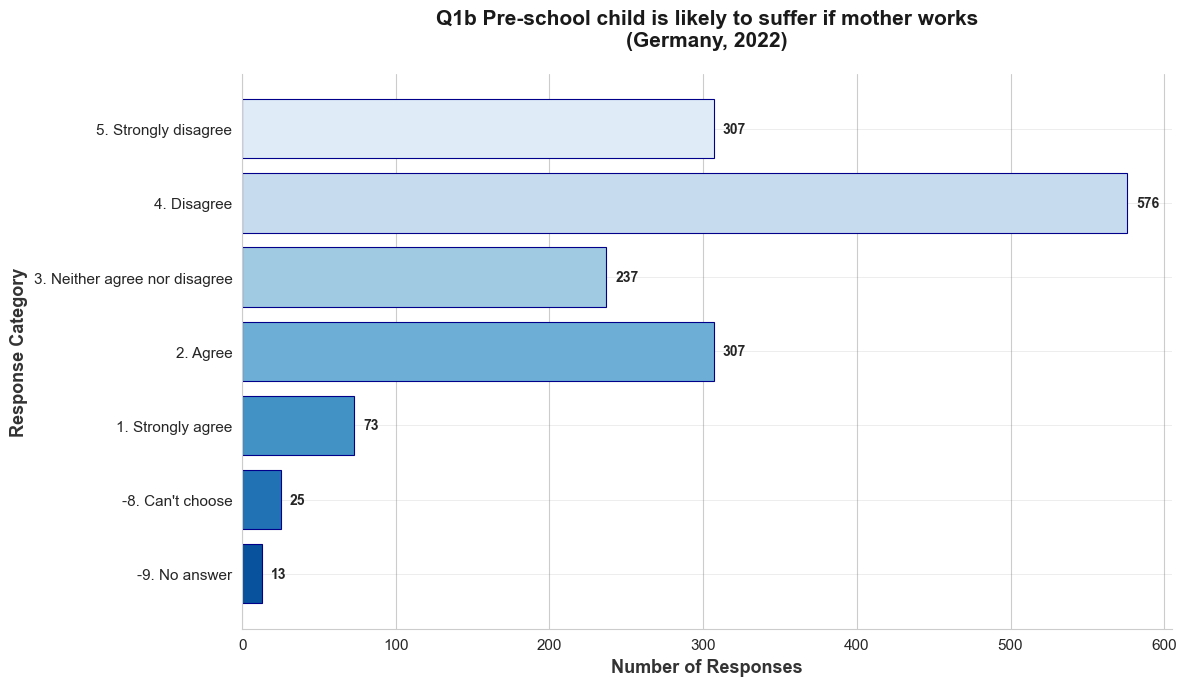

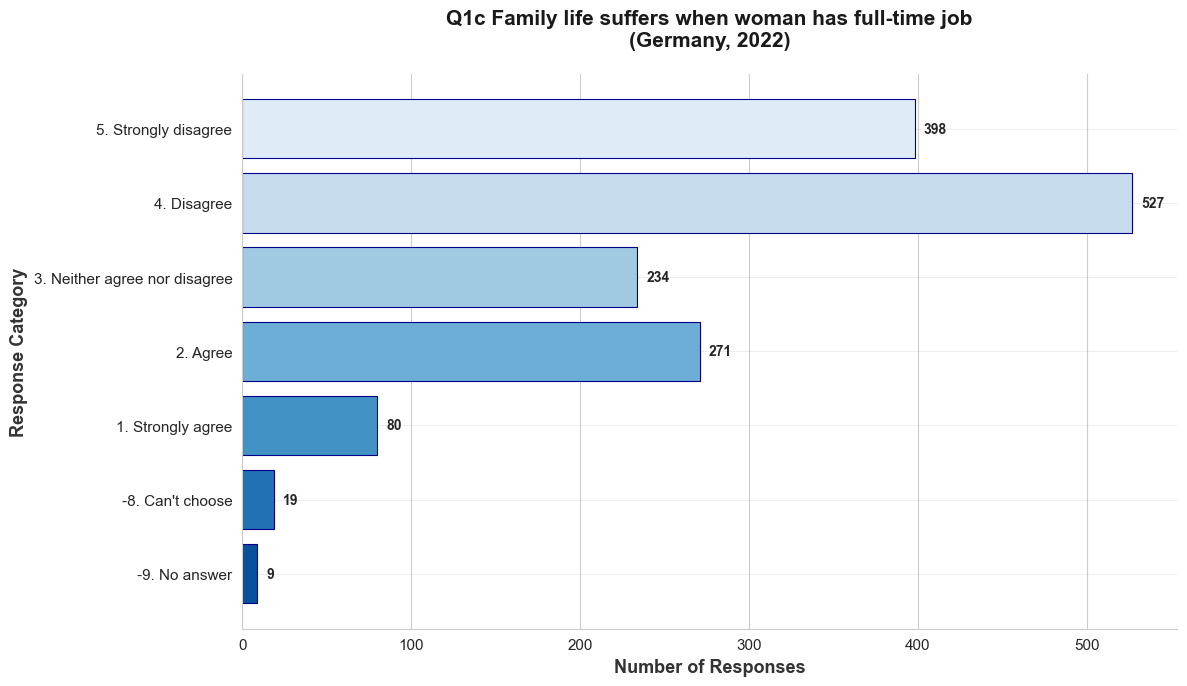

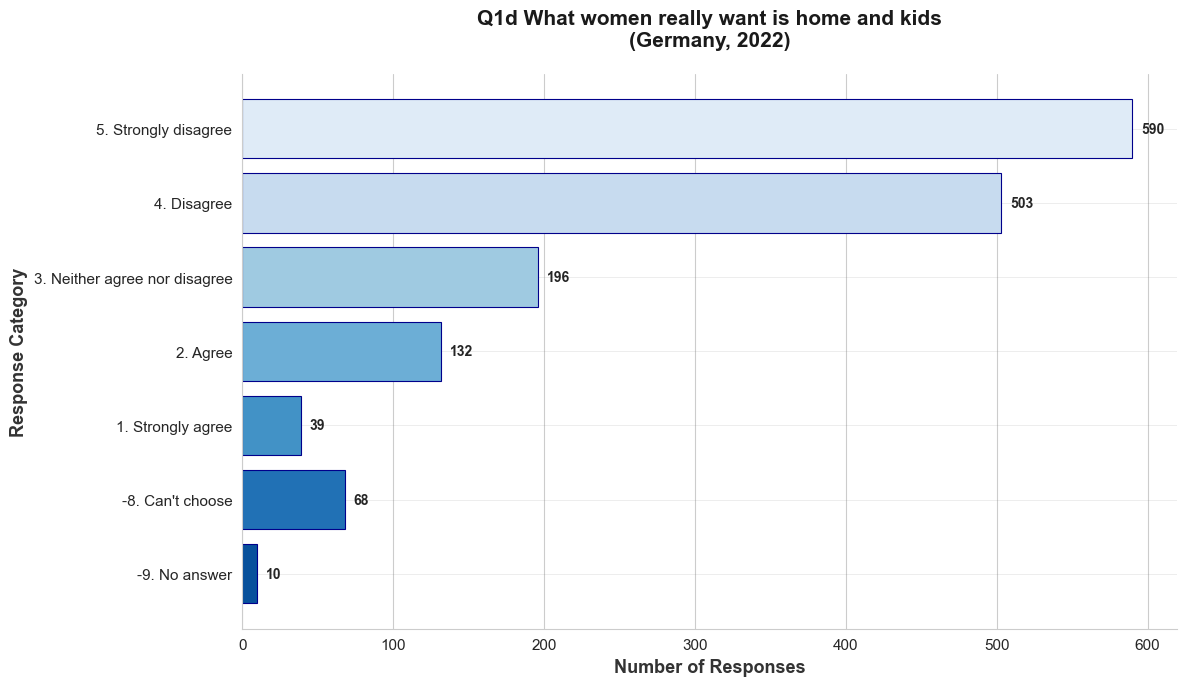

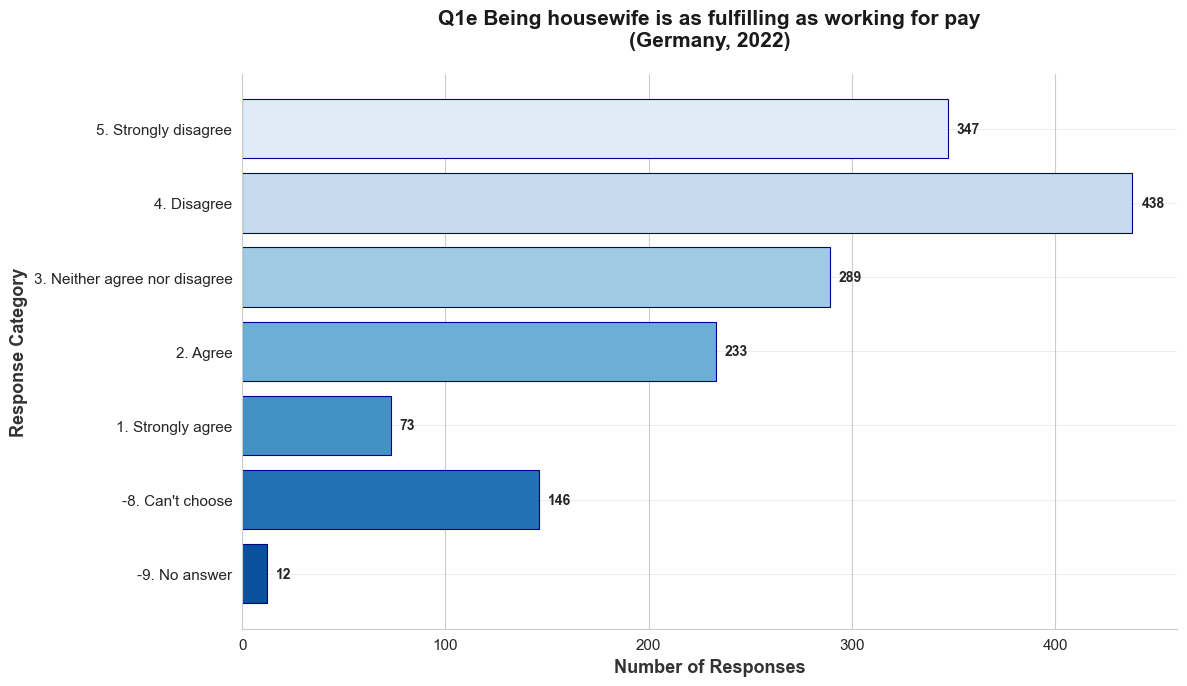

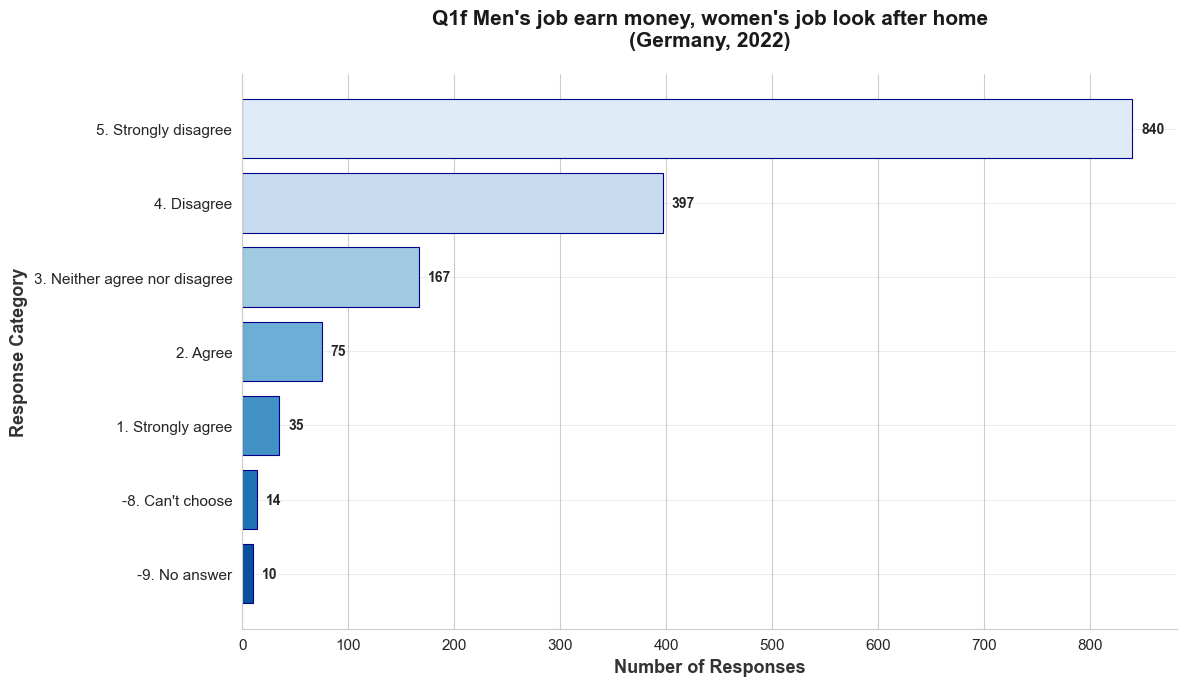

In [ ]:
for idx, question in enumerate(selected_questions):
    counts = df_2022_germany[question].value_counts().sort_index()
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    colors = sns.color_palette("Blues_r", n_colors=len(counts))
    
    bars = ax.barh(counts.index, counts.values, color=colors, edgecolor='darkblue', linewidth=0.8)
    
    for bar in bars:
        width = bar.get_width()
        ax.text(width + max(counts.values)*0.01, bar.get_y() + bar.get_height()/2, 
                f'{int(width)}', ha='left', va='center', fontsize=10, fontweight='bold')
    
    ax.set_xlabel('Number of Responses', fontsize=13, fontweight='bold', color='#333333')
    ax.set_ylabel('Response Category', fontsize=13, fontweight='bold', color='#333333')
    ax.set_title(f'{questions_descriptions[idx]}\n({country}, 2022)', 
                 fontsize=15, fontweight='bold', pad=20, color='#1a1a1a')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(axis='x', alpha=0.4, linestyle='-', linewidth=0.8, color='gray')
    ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.5, color='gray')
    ax.set_axisbelow(True)
    
    plt.tight_layout()
    plt.show()

### Comparative Analysis of Top Survey Questions in chosen countries

In [ ]:
country_1 = country_counts.idxmax()
country_2 = "India"

df_country_1 = df_2022[df_2022['c_alphan'] == country_1]
df_country_2 = df_2022[df_2022['c_alphan'] == country_2]

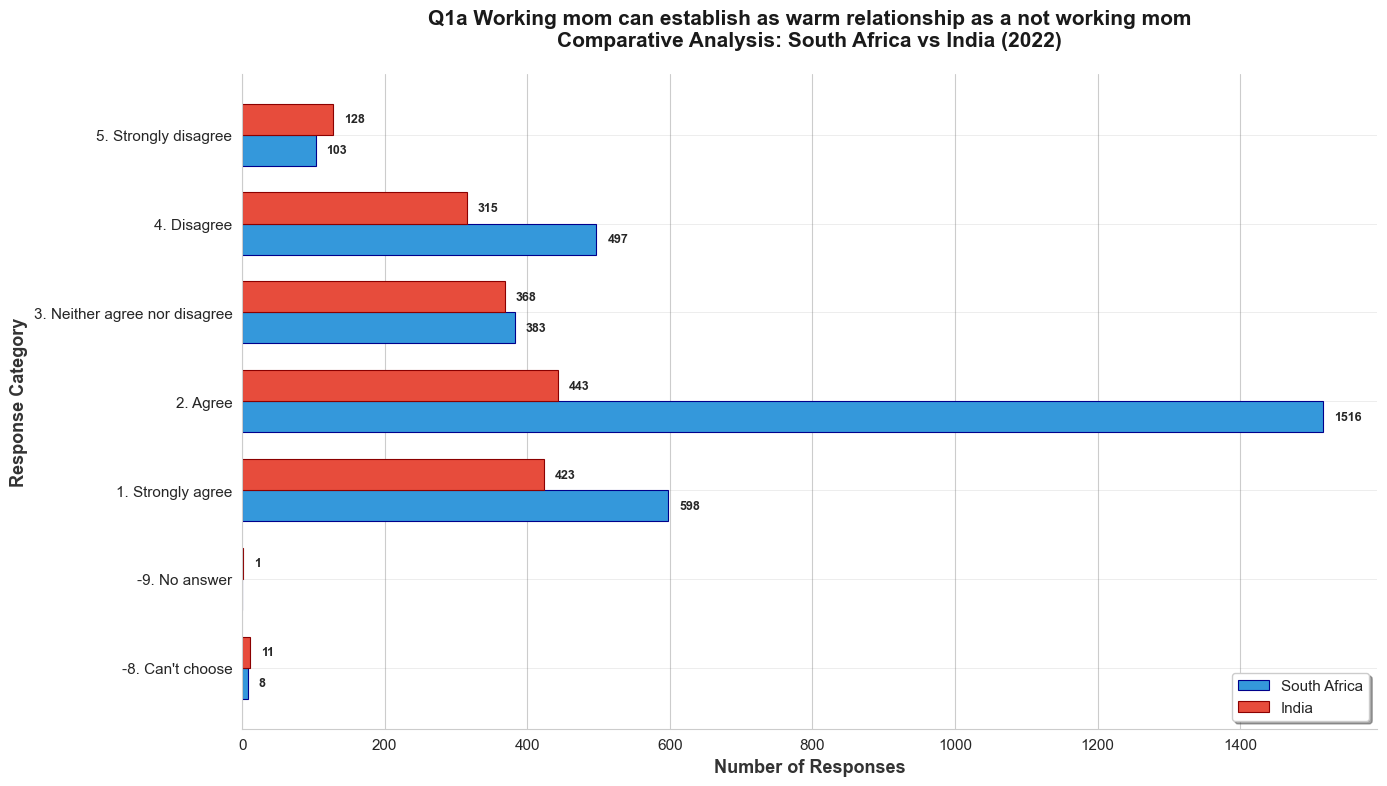

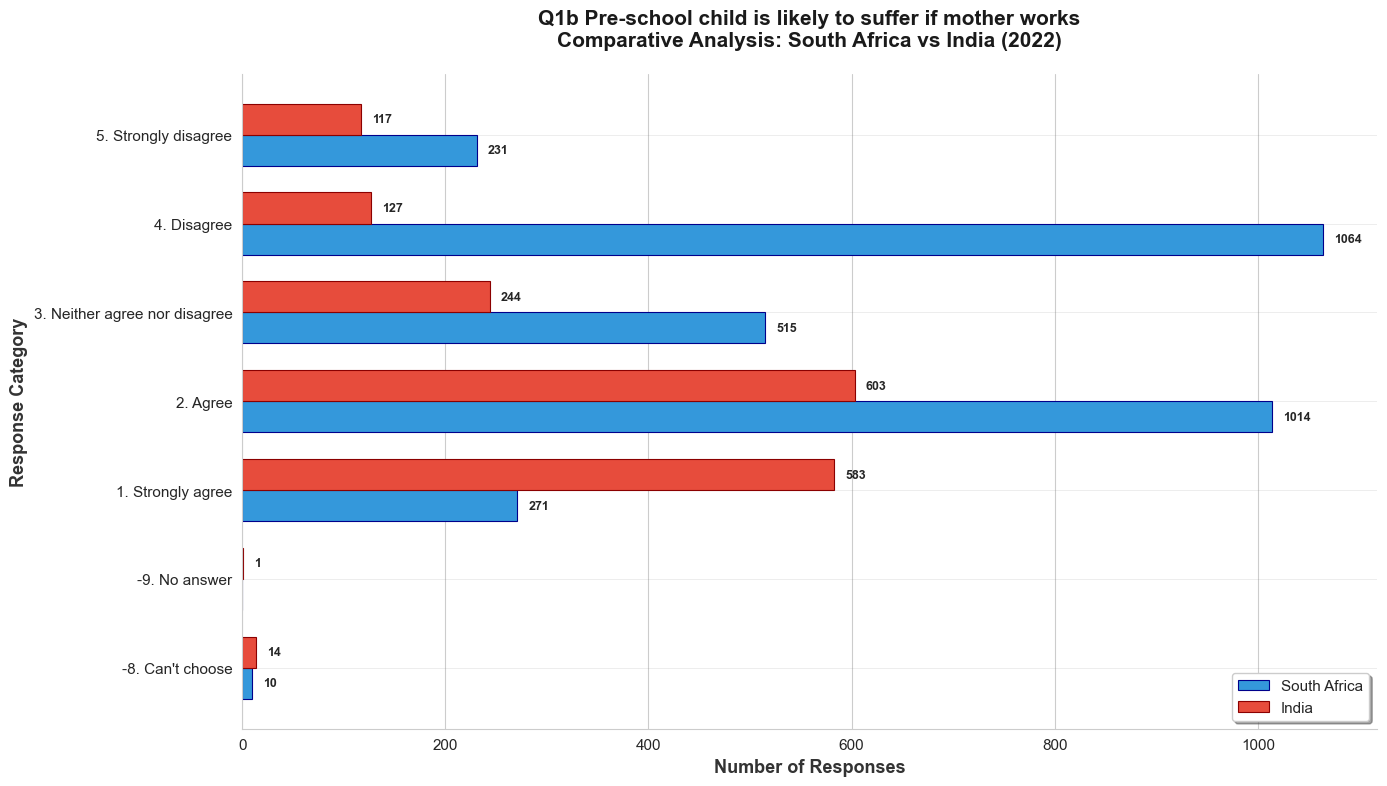

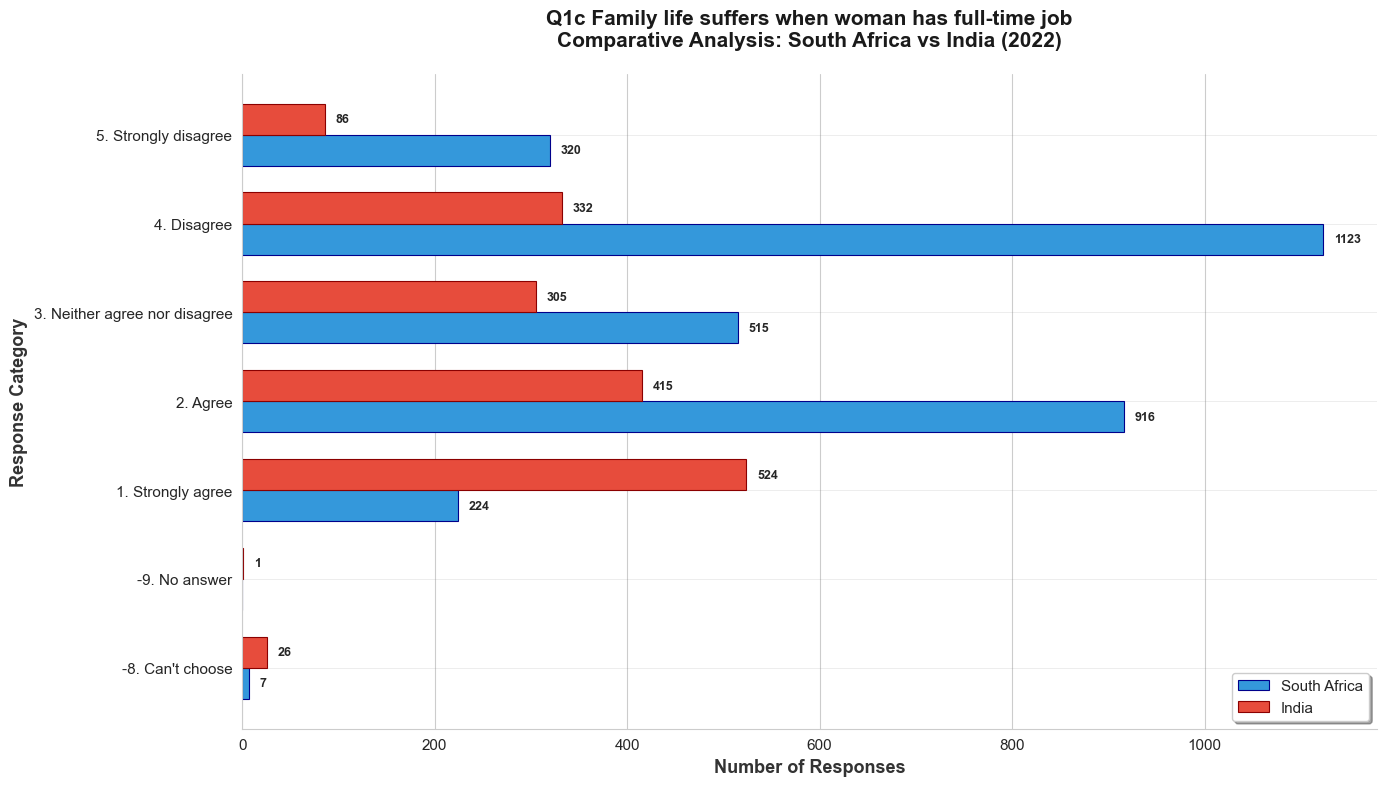

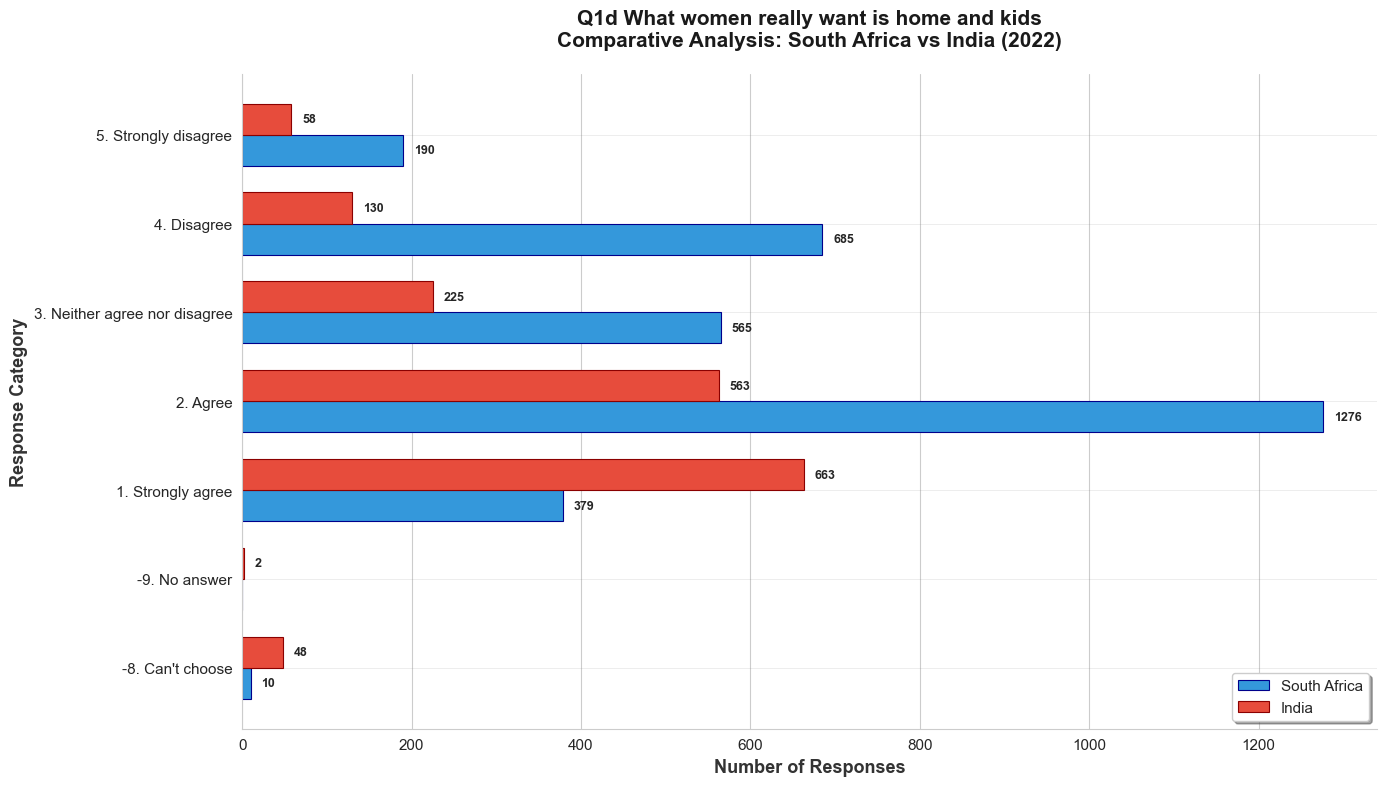

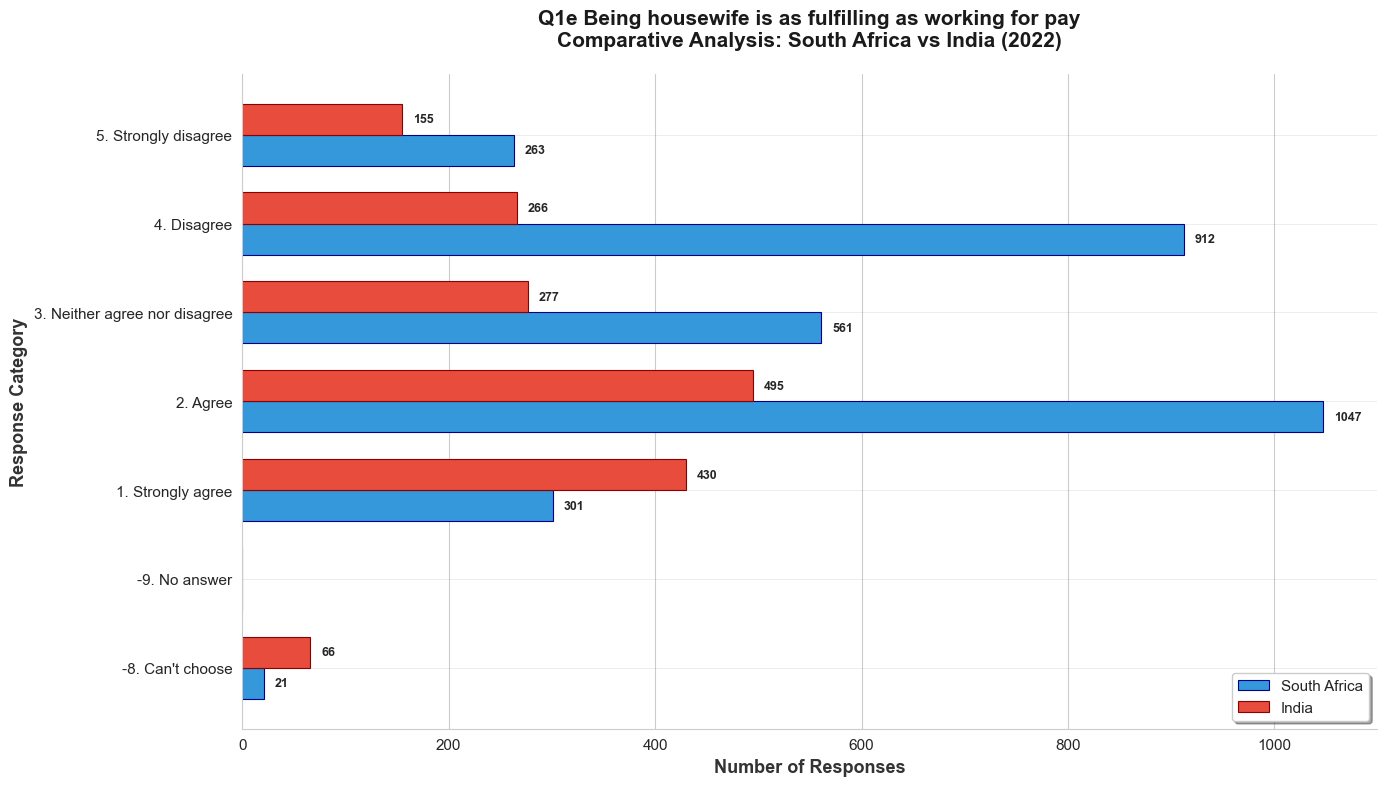

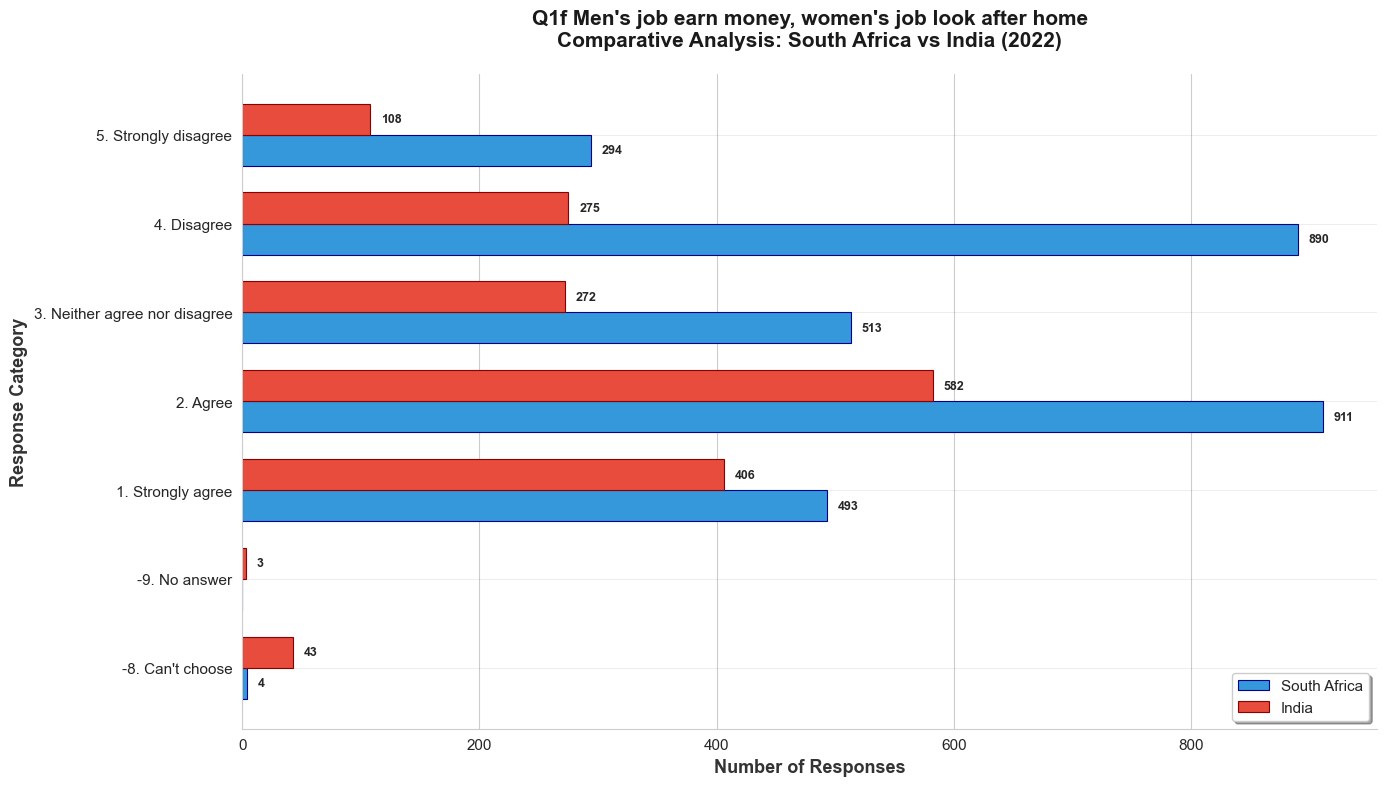

In [ ]:
for idx, question in enumerate(selected_questions):
    counts_1 = df_country_1[question].value_counts().sort_index()
    counts_2 = df_country_2[question].value_counts().sort_index()
    
    all_categories = sorted(set(counts_1.index) | set(counts_2.index))
    counts_1 = counts_1.reindex(all_categories, fill_value=0)
    counts_2 = counts_2.reindex(all_categories, fill_value=0)
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    y_pos = range(len(all_categories))
    bar_height = 0.35
    
    bars_1 = ax.barh([y - bar_height/2 for y in y_pos], counts_1.values, 
                     bar_height, label=country_1, color='#3498db', edgecolor='darkblue', linewidth=0.8)
    bars_2 = ax.barh([y + bar_height/2 for y in y_pos], counts_2.values, 
                     bar_height, label=country_2, color='#e74c3c', edgecolor='darkred', linewidth=0.8)
    
    for i, (bar, count) in enumerate(zip(bars_1, counts_1.values)):
        if count > 0:
            ax.text(count + max(max(counts_1.values), max(counts_2.values))*0.01, 
                   bar.get_y() + bar.get_height()/2, f'{int(count)}', 
                   ha='left', va='center', fontsize=9, fontweight='bold')
    
    for i, (bar, count) in enumerate(zip(bars_2, counts_2.values)):
        if count > 0:
            ax.text(count + max(max(counts_1.values), max(counts_2.values))*0.01, 
                   bar.get_y() + bar.get_height()/2, f'{int(count)}', 
                   ha='left', va='center', fontsize=9, fontweight='bold')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(all_categories)
    ax.set_xlabel('Number of Responses', fontsize=13, fontweight='bold', color='#333333')
    ax.set_ylabel('Response Category', fontsize=13, fontweight='bold', color='#333333')
    ax.set_title(f'{questions_descriptions[idx]}\nComparative Analysis: {country_1} vs {country_2} (2022)', 
                 fontsize=15, fontweight='bold', pad=20, color='#1a1a1a')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(axis='x', alpha=0.4, linestyle='-', linewidth=0.8, color='gray')
    ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.5, color='gray')
    ax.set_axisbelow(True)
    
    ax.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)
    
    plt.tight_layout()
    plt.show()

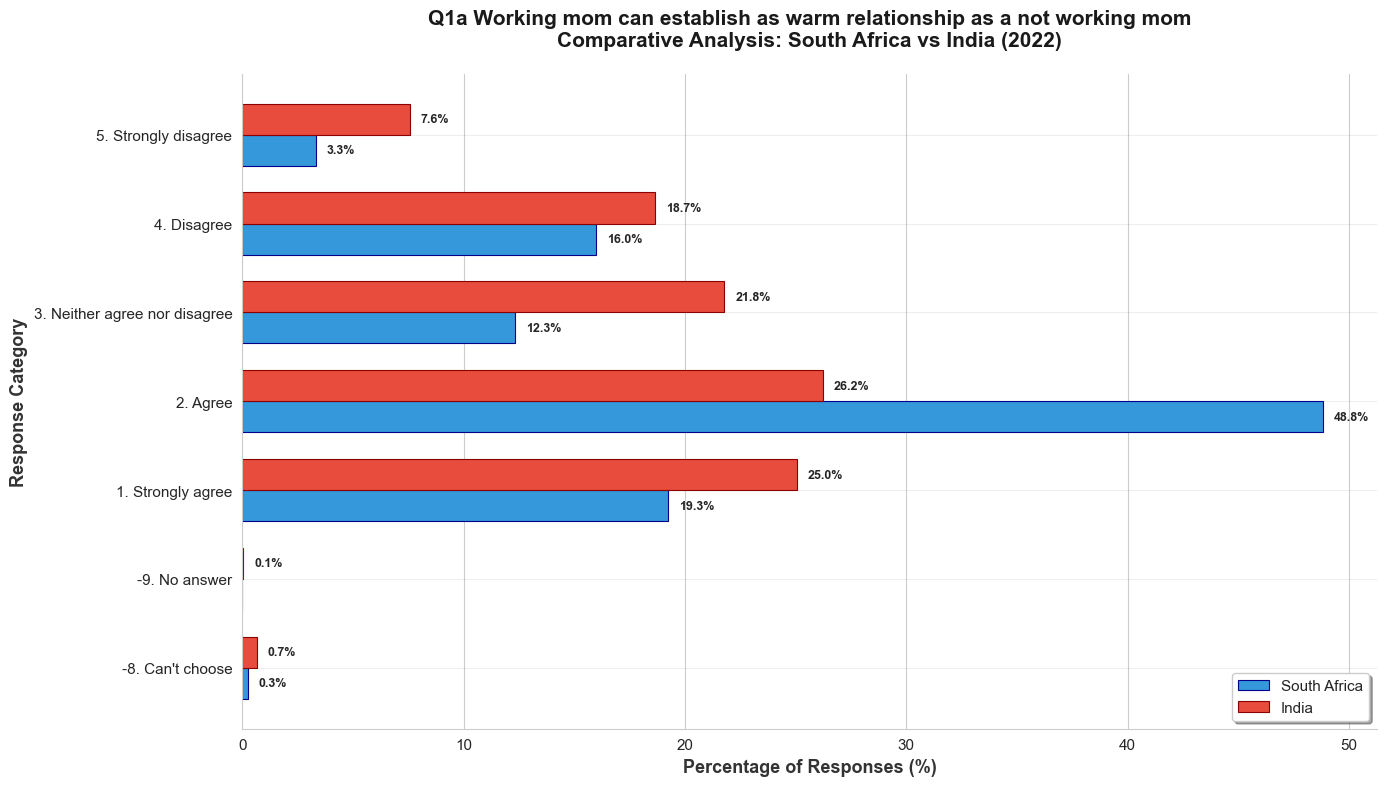

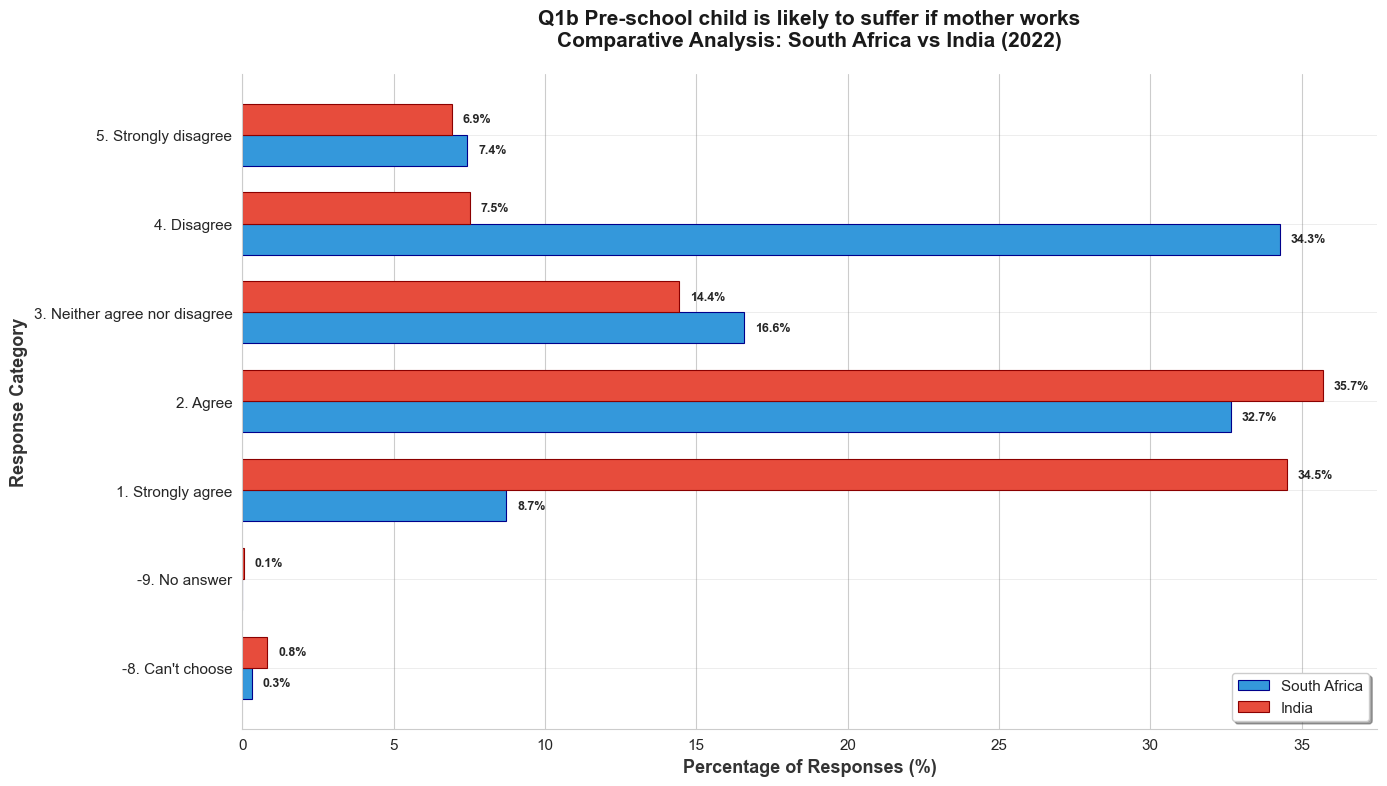

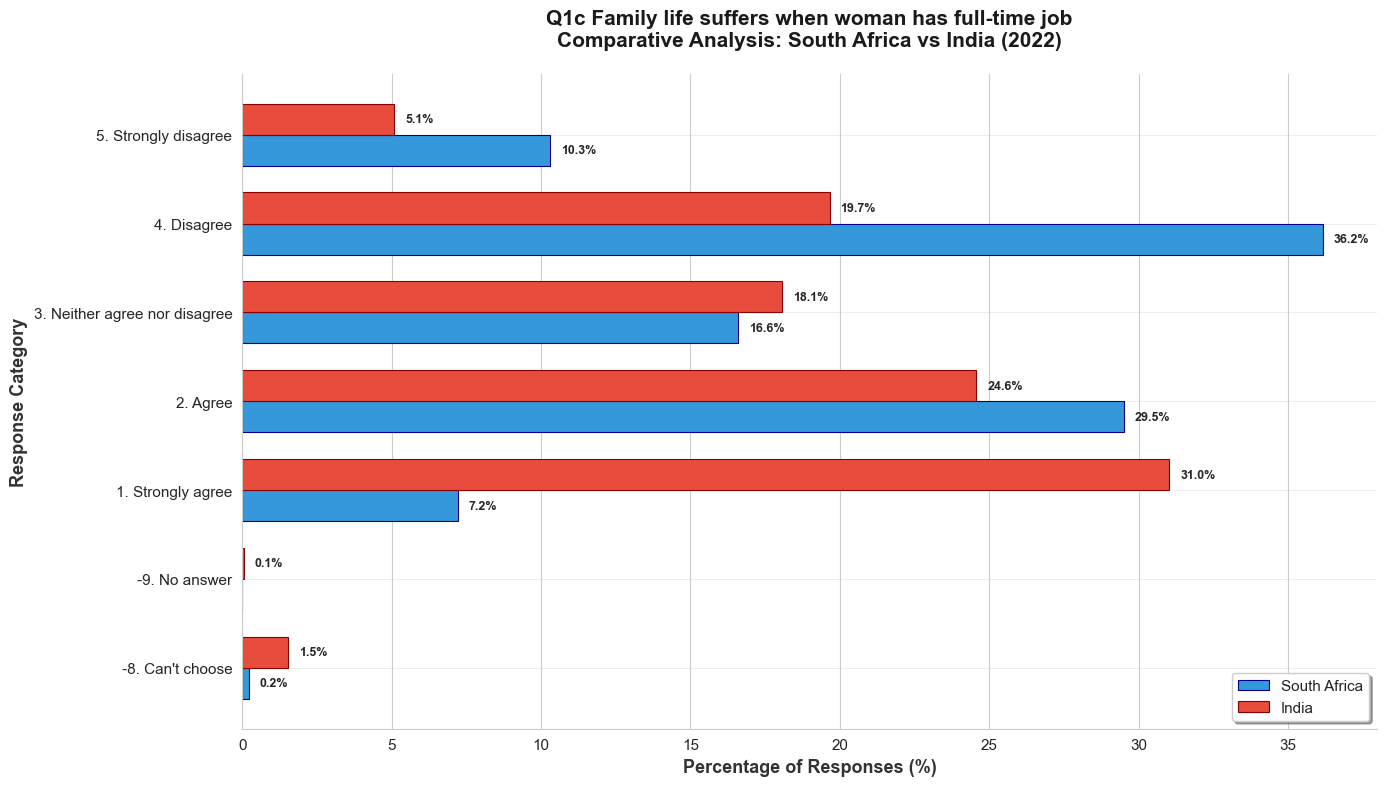

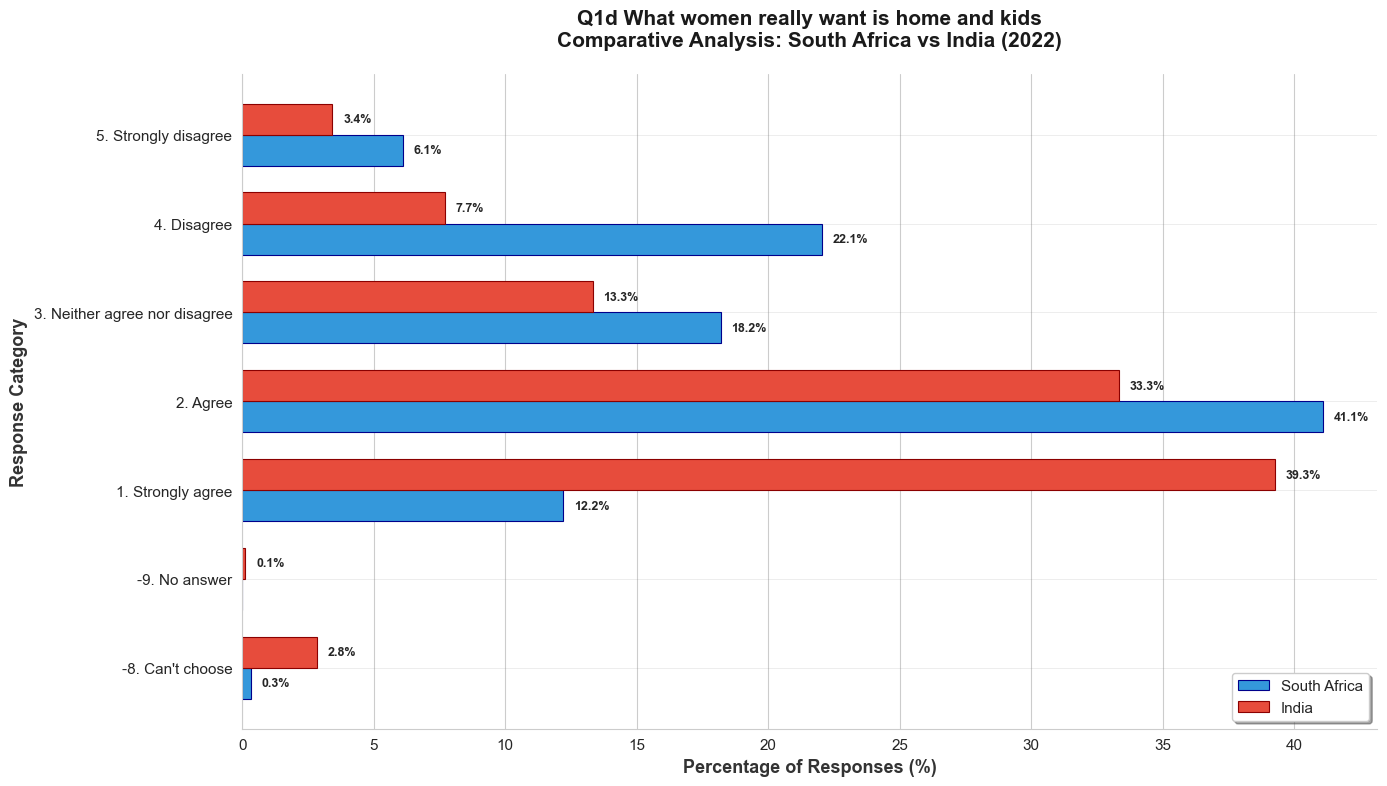

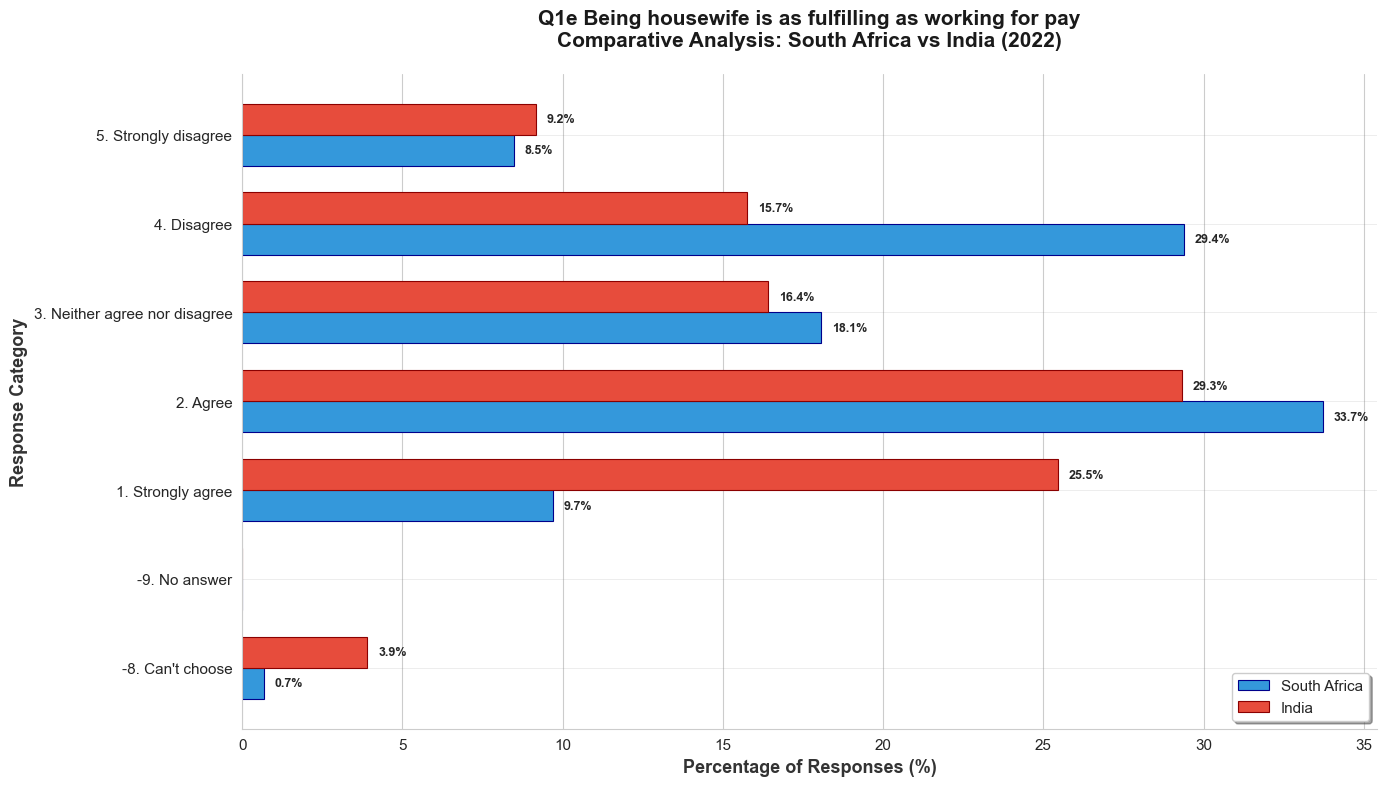

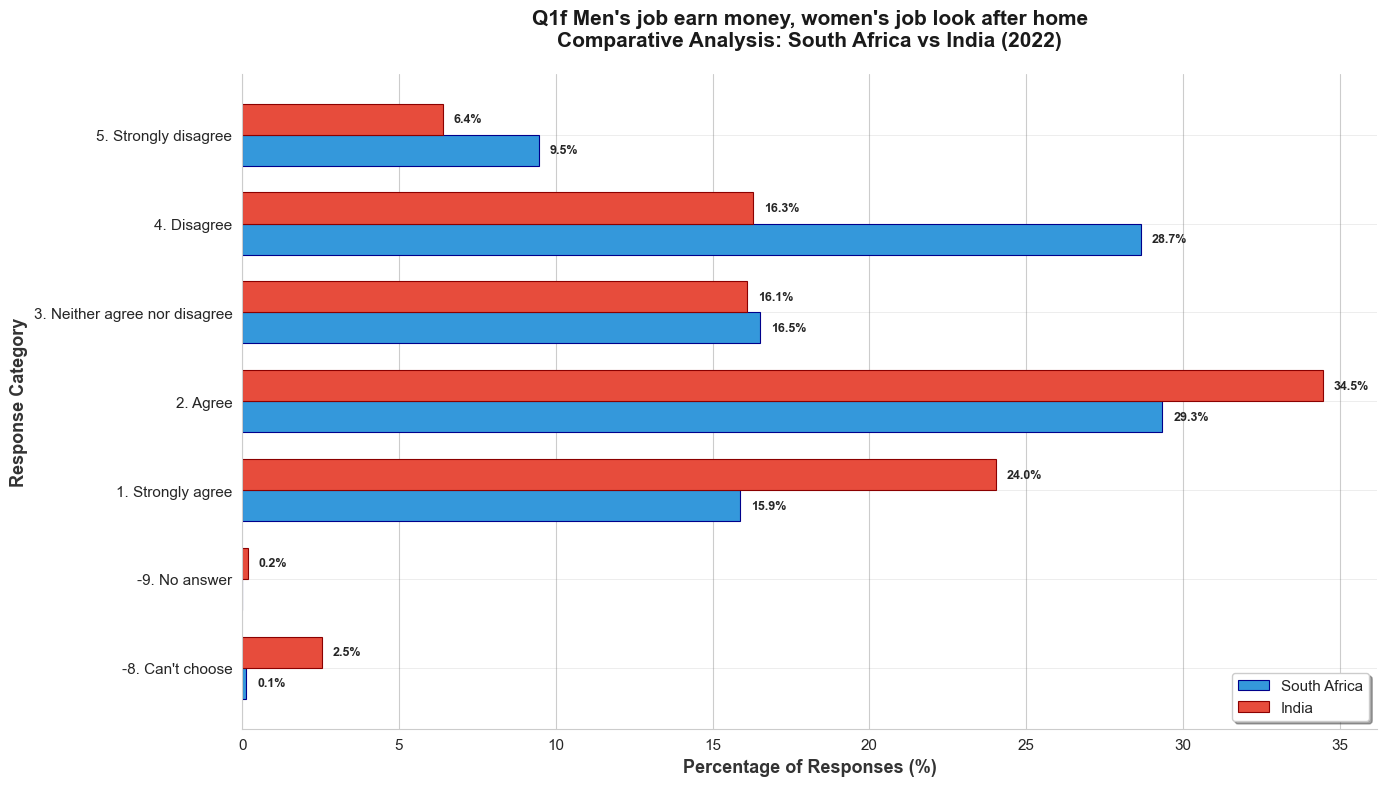

In [ ]:
for idx, question in enumerate(selected_questions):
    counts_1 = df_country_1[question].value_counts().sort_index()
    counts_2 = df_country_2[question].value_counts().sort_index()
    
    all_categories = sorted(set(counts_1.index) | set(counts_2.index))
    counts_1 = counts_1.reindex(all_categories, fill_value=0)
    counts_2 = counts_2.reindex(all_categories, fill_value=0)
    
    pct_1 = (counts_1 / counts_1.sum()) * 100
    pct_2 = (counts_2 / counts_2.sum()) * 100
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    y_pos = range(len(all_categories))
    bar_height = 0.35
    
    bars_1 = ax.barh([y - bar_height/2 for y in y_pos], pct_1.values, 
                     bar_height, label=country_1, color='#3498db', edgecolor='darkblue', linewidth=0.8)
    bars_2 = ax.barh([y + bar_height/2 for y in y_pos], pct_2.values, 
                     bar_height, label=country_2, color='#e74c3c', edgecolor='darkred', linewidth=0.8)
    
    for i, (bar, pct) in enumerate(zip(bars_1, pct_1.values)):
        if pct > 0:
            ax.text(pct + max(max(pct_1.values), max(pct_2.values))*0.01, 
                   bar.get_y() + bar.get_height()/2, f'{pct:.1f}%', 
                   ha='left', va='center', fontsize=9, fontweight='bold')
    
    for i, (bar, pct) in enumerate(zip(bars_2, pct_2.values)):
        if pct > 0:
            ax.text(pct + max(max(pct_1.values), max(pct_2.values))*0.01, 
                   bar.get_y() + bar.get_height()/2, f'{pct:.1f}%', 
                   ha='left', va='center', fontsize=9, fontweight='bold')
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(all_categories)
    ax.set_xlabel('Percentage of Responses (%)', fontsize=13, fontweight='bold', color='#333333')
    ax.set_ylabel('Response Category', fontsize=13, fontweight='bold', color='#333333')
    ax.set_title(f'{questions_descriptions[idx]}\nComparative Analysis: {country_1} vs {country_2} (2022)', 
                 fontsize=15, fontweight='bold', pad=20, color='#1a1a1a')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(axis='x', alpha=0.4, linestyle='-', linewidth=0.8, color='gray')
    ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.5, color='gray')
    ax.set_axisbelow(True)
    
    ax.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)
    
    plt.tight_layout()
    plt.show()

### Temporal Analysis

In [ ]:
import pyreadstat
df_2012, meta = pyreadstat.read_sav('data/2012/2012-l.sav')
df_2012['C_ALPHAN'] = df_2012['C_ALPHAN'].map(country_data)
print(f"Total records in the 2012 survey data: {len(df_2012)}")

Total records in the 2012 survey data: 61754


In [ ]:
df_2022['v1'].value_counts()

v1
2. Agree                         17449
1. Strongly agree                16938
3. Neither agree nor disagree     5005
4. Disagree                       4478
5. Strongly disagree              1138
-8. Can't choose                   618
-9. No answer                      136
Name: count, dtype: int64

In [ ]:
mapping_dict = {
    1: '1. Strongly agree',
    2: '2. Agree',
    3: '3. Neither agree nor disagree',
    4: '4. Disagree',
    5: '5. Strongly disagree',
    8: '8. Can\'t choose',
    9: '9. No answer',
    0: '0. Can\'t choose'
}

In [ ]:
q2022_questions =  json.load(open('data/2022/ZA10000_variables_short.json', 'r'))
q2022_questions = {k: v for k, v in q2022_questions.items() if 'v' in k.lower() and any(char.isdigit() for char in k)}
print(f"Total questions in 2022 survey data: {len(q2022_questions)}")
q2012_questions = json.load(open('data/2012/ZA5900_variables_short.json', 'r'))
q2012_questions = {k: v for k, v in q2012_questions.items() if 'v' in k.lower() and any(char.isdigit() for char in k)}
print(f"Total questions in 2012 survey data: {len(q2012_questions)}")
for i in range(1, 5):
    q2012_questions.pop(f'V{i}', None)
q2022_questions = {k: ' '.join(v.split(' ')[1:]) for k, v in q2022_questions.items()}
q2012_questions = {k: ' '.join(v.split(' ')[1:]) for k, v in q2012_questions.items()}

Total questions in 2022 survey data: 72
Total questions in 2012 survey data: 91


In [ ]:
# keys with common questions between 2012 and 2022 surveys
common_questions_keys_2022 = []
common_questions_keys_2012 = []
for q, keys in q2022_questions.items():
    if keys in q2012_questions.values():
        common_questions_keys_2022.append(q)
for q, keys in q2012_questions.items():
    if keys in q2022_questions.values():
        common_questions_keys_2012.append(q)

print(f"Total common questions between 2012 and 2022 surveys: {len(common_questions_keys_2022)}")

Total common questions between 2012 and 2022 surveys: 11


In [ ]:
# selected_common_questions_2022 = ["Men's job earn money, women's job look after home",
# selected_common_questions_2022 = ['Same sex female couple can raise child as well',]
#  'Same sex male couple can raise child as well',]
selected_common_questions_2022 = [
    "Men's job earn money, women's job look after home",
    "Same sex female couple can raise child as well",
    "Same sex male couple can raise child as well",
]
selected_common_questions_2012 = selected_common_questions_2022.copy()
selected_common_questions_2022_keys = [ k for k, v in q2022_questions.items() if v in selected_common_questions_2022 ]
selected_common_questions_2012_keys = [ k for k, v in q2012_questions.items() if v in selected_common_questions_2012 ]

In [ ]:
df_2012_country_1 = df_2012[df_2012['C_ALPHAN'] == country_1]
df_2012_country_2 = df_2012[df_2012['C_ALPHAN'] == country_2]
df_2022_country_1 = df_2022[df_2022['c_alphan'] == country_1]
df_2022_country_2 = df_2022[df_2022['c_alphan'] == country_2]

print(f"Total records in 2012 survey data for {country_1}: {len(df_2012_country_1)}")
print(f"Total records in 2012 survey data for {country_2}: {len(df_2012_country_2)}")
print(f"Total records in 2022 survey data for {country_1}: {len(df_2022_country_1)}")
print(f"Total records in 2022 survey data for {country_2}: {len(df_2022_country_2)}")

Total records in 2012 survey data for South Africa: 2547
Total records in 2012 survey data for India: 1660
Total records in 2022 survey data for South Africa: 3105
Total records in 2022 survey data for India: 1689


Processing question: v6, value: Men's job earn money, women's job look after home


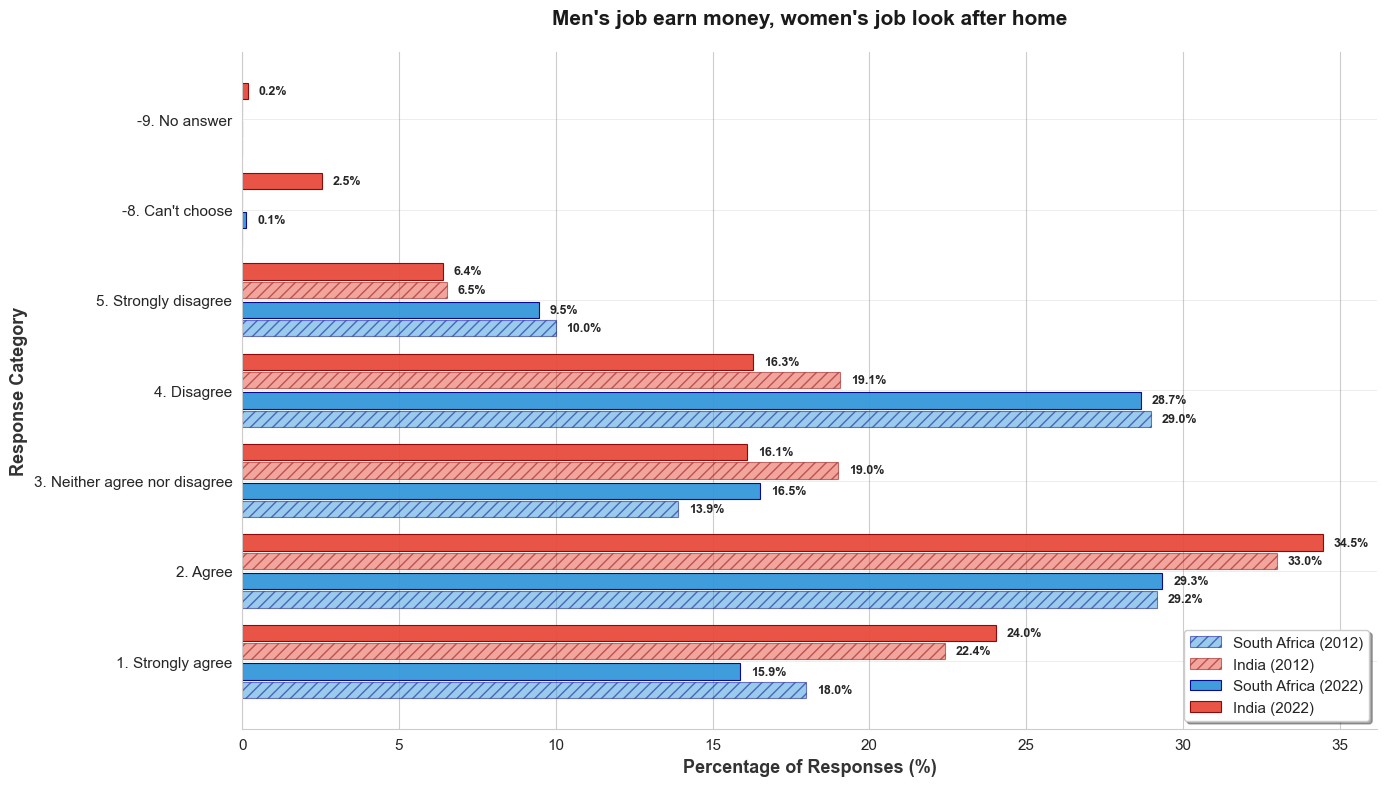

Processing question: v17, value: Same sex female couple can raise child as well


/var/folders/29/4fw9_r0j43523wypj9p3hfnw0000gn/T/ipykernel_99044/2916895573.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s12_c1 = df_2012_country_1[q12].map(mapping_dict).fillna(df_2012_country_1[q12])
/var/folders/29/4fw9_r0j43523wypj9p3hfnw0000gn/T/ipykernel_99044/2916895573.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s12_c2 = df_2012_country_2[q12].map(mapping_dict).fillna(df_2012_country_2[q12])


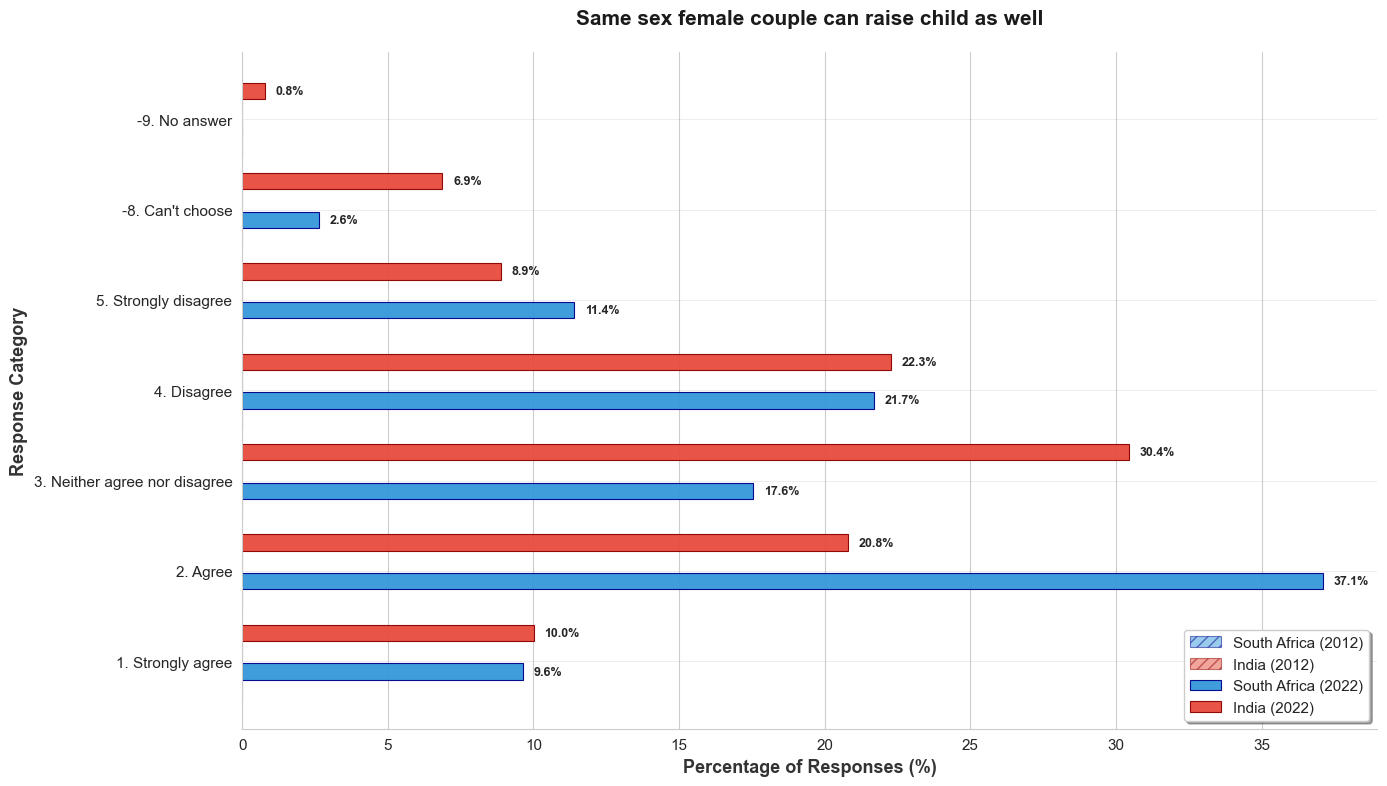

Processing question: v18, value: Same sex male couple can raise child as well


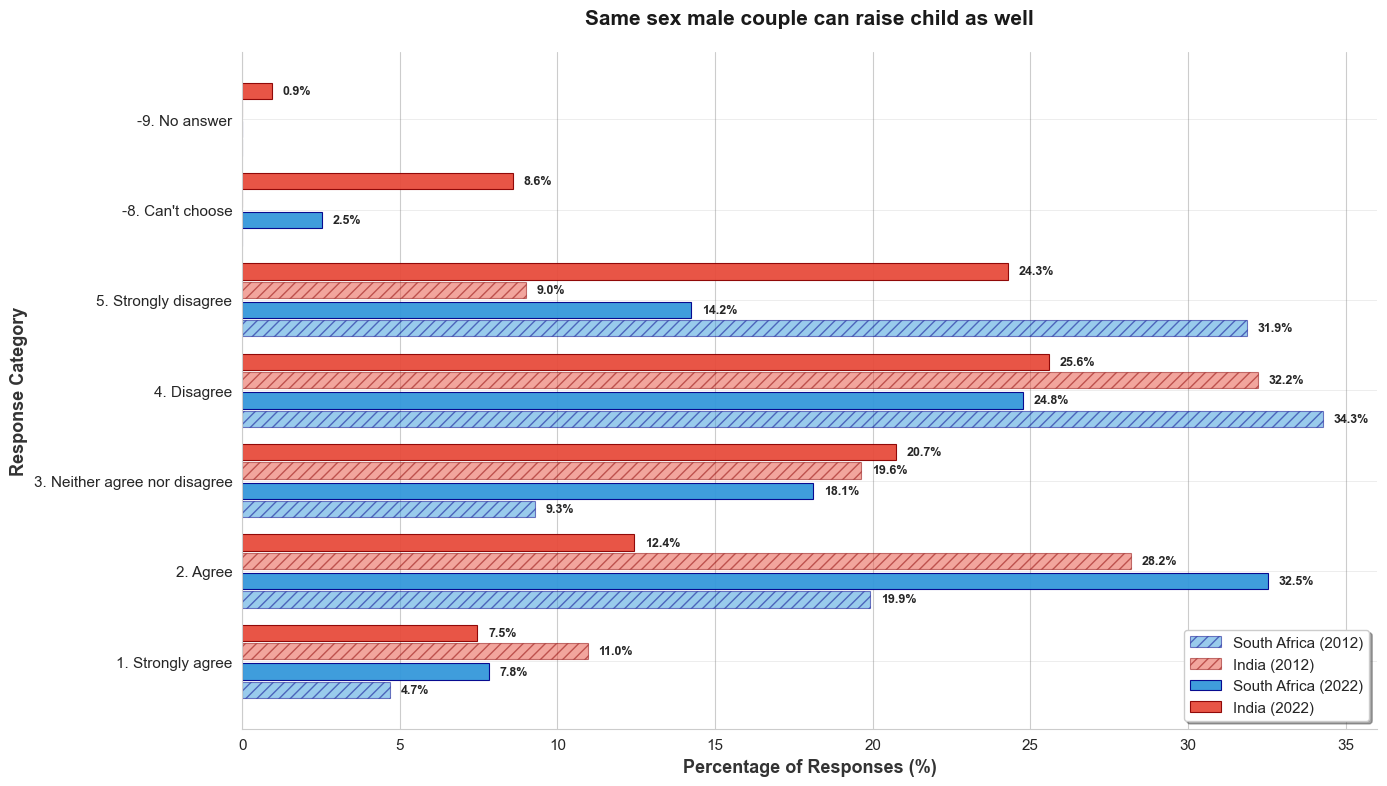

In [ ]:
import numpy as np
COLOR_C1 = "#3498db"
EDGE_C1  = "darkblue"
COLOR_C2 = "#e74c3c"
EDGE_C2  = "darkred"

LIKERT_ORDER = list(dict.fromkeys(mapping_dict.values()))

def pct(series: pd.Series) -> pd.Series:
    total = int(series.sum())
    if total == 0:
        return series.astype(float)
    return (series / total) * 100.0

def category_order(unioned: list) -> list:
    ordered = [lab for lab in LIKERT_ORDER if lab in unioned]
    remaining = [lab for lab in unioned if lab not in ordered]
    # Put numeric-like first among remaining
    def sort_key(x):
        s = str(x).strip()
        return (0, int(s)) if s.lstrip('-').isdigit() else (1, s)
    ordered += sorted(remaining, key=sort_key)
    return ordered

for q22 in selected_common_questions_2022_keys:
    print(f"Processing question: {q22}, value: {q2022_questions.get(q22, q22)}")
    # Find paired 2012 key by aligned index
    idx = common_questions_keys_2022.index(q22)
    q12 = common_questions_keys_2012[idx]
    if q12 not in df_2012.columns or q22 not in df_2022.columns:
        continue

    # Use question text from 2022 for the title
    question_text = q2022_questions.get(q22, q22)

    # Map codes to labels (only where mapping applies)
    s12_c1 = df_2012_country_1[q12].map(mapping_dict).fillna(df_2012_country_1[q12])
    s12_c2 = df_2012_country_2[q12].map(mapping_dict).fillna(df_2012_country_2[q12])
    s22_c1 = df_2022_country_1[q22].map(mapping_dict).fillna(df_2022_country_1[q22])
    s22_c2 = df_2022_country_2[q22].map(mapping_dict).fillna(df_2022_country_2[q22])

    # Counts per category
    c12_c1 = s12_c1.value_counts().sort_index()
    c12_c2 = s12_c2.value_counts().sort_index()
    c22_c1 = s22_c1.value_counts().sort_index()
    c22_c2 = s22_c2.value_counts().sort_index()

    # Union categories across years and countries
    all_cats = list(set(c12_c1.index) | set(c12_c2.index) | set(c22_c1.index) | set(c22_c2.index))
    if len(all_cats) == 0:
        continue
    all_cats = category_order(all_cats)

    # Align counts
    c12_c1 = c12_c1.reindex(all_cats, fill_value=0)
    c12_c2 = c12_c2.reindex(all_cats, fill_value=0)
    c22_c1 = c22_c1.reindex(all_cats, fill_value=0)
    c22_c2 = c22_c2.reindex(all_cats, fill_value=0)

    # Percentages
    p12_c1 = pct(c12_c1)
    p12_c2 = pct(c12_c2)
    p22_c1 = pct(c22_c1)
    p22_c2 = pct(c22_c2)

    if (p12_c1.sum() + p12_c2.sum() + p22_c1.sum() + p22_c2.sum()) == 0:
        continue

    # Plot (four bars per category)
    fig, ax = plt.subplots(figsize=(14, 8))
    y = np.arange(len(all_cats))
    bar_h = 0.18
    gap = bar_h * 0.25

    pos_c1_2012 = y - (bar_h * 1.5 + gap)
    pos_c1_2022 = y - (bar_h * 0.5 + gap/2)
    pos_c2_2012 = y + (bar_h * 0.5 + gap/2)
    pos_c2_2022 = y + (bar_h * 1.5 + gap)

    b12_c1 = ax.barh(pos_c1_2012, p12_c1.values, bar_h, label=f'{country_1} (2012)',
                     color=COLOR_C1, edgecolor=EDGE_C1, linewidth=0.8, alpha=0.5, hatch='///')
    b12_c2 = ax.barh(pos_c2_2012, p12_c2.values, bar_h, label=f'{country_2} (2012)',
                     color=COLOR_C2, edgecolor=EDGE_C2, linewidth=0.8, alpha=0.5, hatch='///')
    b22_c1 = ax.barh(pos_c1_2022, p22_c1.values, bar_h, label=f'{country_1} (2022)',
                     color=COLOR_C1, edgecolor=EDGE_C1, linewidth=0.8, alpha=0.95)
    b22_c2 = ax.barh(pos_c2_2022, p22_c2.values, bar_h, label=f'{country_2} (2022)',
                     color=COLOR_C2, edgecolor=EDGE_C2, linewidth=0.8, alpha=0.95)

    # Labels
    max_pct = max(p12_c1.max(), p12_c2.max(), p22_c1.max(), p22_c2.max())
    offset = max_pct * 0.01

    for bar, pctv in zip(b12_c1, p12_c1.values):
        if pctv > 0: ax.text(pctv + offset, bar.get_y() + bar.get_height()/2, f'{pctv:.1f}%', ha='left', va='center', fontsize=9, fontweight='bold')
    for bar, pctv in zip(b12_c2, p12_c2.values):
        if pctv > 0: ax.text(pctv + offset, bar.get_y() + bar.get_height()/2, f'{pctv:.1f}%', ha='left', va='center', fontsize=9, fontweight='bold')
    for bar, pctv in zip(b22_c1, p22_c1.values):
        if pctv > 0: ax.text(pctv + offset, bar.get_y() + bar.get_height()/2, f'{pctv:.1f}%', ha='left', va='center', fontsize=9, fontweight='bold')
    for bar, pctv in zip(b22_c2, p22_c2.values):
        if pctv > 0: ax.text(pctv + offset, bar.get_y() + bar.get_height()/2, f'{pctv:.1f}%', ha='left', va='center', fontsize=9, fontweight='bold')

    # Axes and title
    ax.set_yticks(y)
    ax.set_yticklabels(all_cats)
    ax.set_xlabel('Percentage of Responses (%)', fontsize=13, fontweight='bold', color='#333333')
    ax.set_ylabel('Response Category', fontsize=13, fontweight='bold', color='#333333')
    ax.set_title(question_text, fontsize=15, fontweight='bold', pad=20, color='#1a1a1a')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='x', alpha=0.4, linestyle='-', linewidth=0.8, color='gray')
    ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.5, color='gray')
    ax.set_axisbelow(True)
    ax.legend(loc='lower right', fontsize=11, frameon=True, shadow=True)

    plt.tight_layout()
    plt.show()
# ...existing code...